# Tugas Praktikum

## 1. Tugas K-Means
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
cust = pd.read_csv("Mall_Customers.csv")
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#seleksi fitur umur dan pendapatan
# cust['Gender'] = cust['Gender'].map({'Male': 0, 'Female': 1})
x = cust.iloc[:, [2,3]]
x.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


C:\Users\GIO\AppData\Local\Temp\ipykernel_18572\1494073560.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x.iloc[:,0], x.iloc[:,1],  cmap='viridis', s=50)


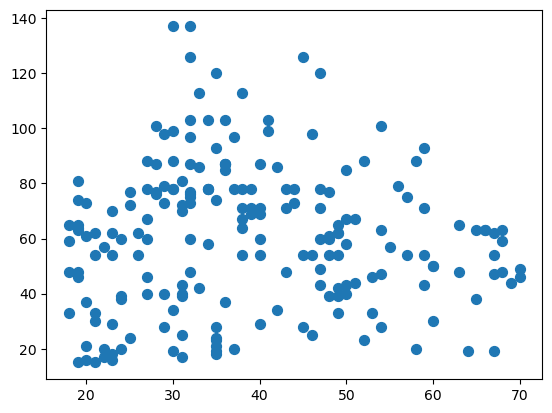

In [4]:
#plotttt

plt.scatter(x.iloc[:,0], x.iloc[:,1],  cmap='viridis', s=50)

c:\Users\GIO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\GIO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\GIO\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GIO\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^

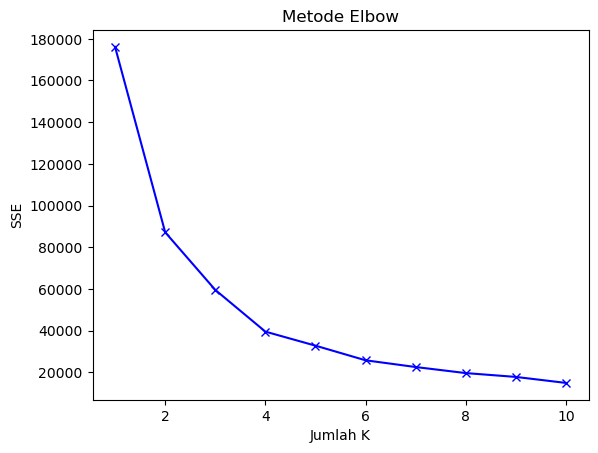

In [5]:
#cari k terbaik dengan metoed elbow

sse = []

k= range(1, 11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

plt.plot(k, sse, 'bx-')
plt.xlabel('Jumlah K')
plt.ylabel('SSE')
plt.title('Metode Elbow')
plt.show()

c:\Users\GIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


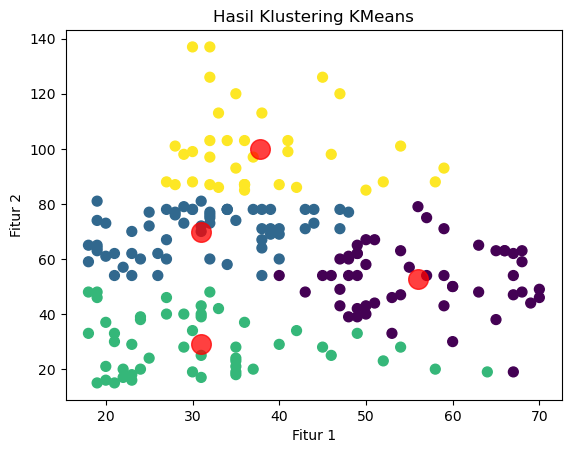

In [6]:
#hasil menunjukkan 4 adalah k terbaik

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75)
plt.title('Hasil Klustering KMeans')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()


## 2. Tugas DBSCAN
1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

5. Lakukan eksperimen:
    - eps = 0.05, 0.1, 0.3, 0.5
    - min_samples = 3, 10, 20
    - Catat perubahan klaster, noise, dan kualitas evaluasi.

In [7]:
from sklearn.datasets import make_moons

#dataset moon 1000
x,y = make_moons(n_samples=1000, noise=0.05, random_state=0)

#dbscan 0.2 eps, min_samples 5, hitung klaster dan nois
db = DBSCAN(eps=0.2, min_samples=5).fit(x)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print("estimasi jumlah kluster: %d" % n_clusters_)
print("estimasi jumlah nois: %d" % n_noise_)


estimasi jumlah kluster: 2
estimasi jumlah nois: 0


In [8]:
#evaluasi metrik homogen, komplit, v-measure, ARI, AMI, silhouette

print(f"Homogeneity: {metrics.homogeneity_score(y, labels): .3f}")
print(f"Completeness: {metrics.completeness_score(y, labels): .3f}")
print(f"V-Measure: {metrics.v_measure_score(y, labels): .3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels): .3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, labels): .3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, labels): .3f}")

Homogeneity:  1.000
Completeness:  1.000
V-Measure:  1.000
Adjusted Rand Index:  1.000
Adjusted Mutual Information:  1.000
Silhouette Coefficient:  0.335


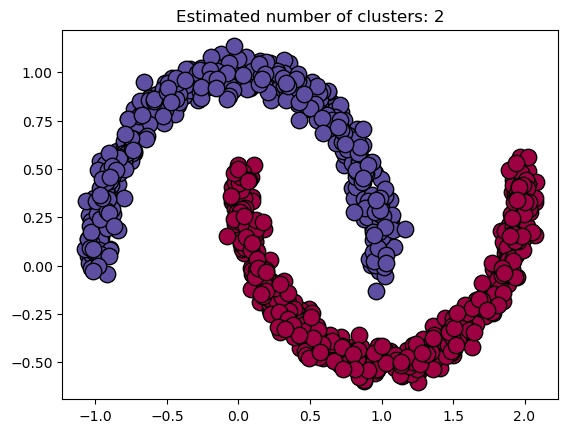

In [9]:
#Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

uniq_label = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = plt.cm.Spectral(np.linspace(0, 1, len(uniq_label)))
for k, col, in zip(uniq_label, colors):
    if k == -1:
        #black digunakan untuk noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    (
        plt.scatter(
            xy[:,0], xy[:, 1], marker="o", facecolor=tuple(col), edgecolor="k", s=140
        )
    )

    xy = x[class_member_mask & ~core_samples_mask]
    (
        plt.scatter(
            xy[:, 0], xy[:, 1], marker="o", facecolor=tuple(col), edgecolor="k", s=60
        )
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [10]:
#Lakukan eksperimen:
    # - eps = 0.05, 0.1, 0.3, 0.5
    # - min_samples = 3
    # - Catat perubahan klaster, noise, dan kualitas evaluasi.

#dbscan 0.05, 0.1, 0.3, 0.5 eps, min_samples 3, hitung klaster dan nois
db005 = DBSCAN(eps=0.05, min_samples=3).fit(x)
db01 = DBSCAN(eps=0.1, min_samples=3).fit(x)
db03 = DBSCAN(eps=0.3, min_samples=3).fit(x)
db05 = DBSCAN(eps=0.5, min_samples=3).fit(x)

labels005 = db005.labels_
labels01 = db01.labels_
labels03 = db03.labels_
labels05 = db05.labels_

labels_list = ["labels005", "labels01", "labels03", "labels05"]
labels_data = [labels005, labels01, labels03, labels05]

for name, label in zip(labels_list, labels_data):
    n_clusters_ = len(set(label)) - (1 if -1 in label else 0)
    n_noise_ = list(label).count(-1)

    print(f"estimasi jumlah kluster {name}: %d" % n_clusters_)
    print(f"estimasi jumlah nois {name}: %d" % n_noise_)
    print("==================================\n")

for name, label in zip(labels_list, labels_data):
    print(f"Evaluasi metrik untuk {name}:")
    print(f"Homogeneity: {metrics.homogeneity_score(y, label): .3f}")
    print(f"Completeness: {metrics.completeness_score(y, label): .3f}")
    print(f"V-Measure: {metrics.v_measure_score(y, label): .3f}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, label): .3f}")
    print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, label): .3f}")
    if len(set(label)) > 1:
        print(f"Silhouette Coefficient: {metrics.silhouette_score(x, label): .3f}")
    else:
        print("Silhouette Coefficient: Tidak dapat dihitung (hanya memiliki 1 klaster)")
    print("==================================\n")




estimasi jumlah kluster labels005: 7
estimasi jumlah nois labels005: 44

estimasi jumlah kluster labels01: 2
estimasi jumlah nois labels01: 0

estimasi jumlah kluster labels03: 1
estimasi jumlah nois labels03: 0

estimasi jumlah kluster labels05: 1
estimasi jumlah nois labels05: 0

Evaluasi metrik untuk labels005:
Homogeneity:  0.957
Completeness:  0.426
V-Measure:  0.589
Adjusted Rand Index:  0.522
Adjusted Mutual Information:  0.588
Silhouette Coefficient:  0.105

Evaluasi metrik untuk labels01:
Homogeneity:  1.000
Completeness:  1.000
V-Measure:  1.000
Adjusted Rand Index:  1.000
Adjusted Mutual Information:  1.000
Silhouette Coefficient:  0.335

Evaluasi metrik untuk labels03:
Homogeneity:  0.000
Completeness:  1.000
V-Measure:  0.000
Adjusted Rand Index:  0.000
Adjusted Mutual Information:  0.000
Silhouette Coefficient: Tidak dapat dihitung (hanya memiliki 1 klaster)

Evaluasi metrik untuk labels05:
Homogeneity:  0.000
Completeness:  1.000
V-Measure:  0.000
Adjusted Rand Index:  0

In [11]:
#Lakukan eksperimen:
    # - eps = 0.05, 0.1, 0.3, 0.5
    # - min_samples = 10
    # - Catat perubahan klaster, noise, dan kualitas evaluasi.

#dbscan 0.05, 0.1, 0.3, 0.5 eps, min_samples 10, hitung klaster dan nois
db005 = DBSCAN(eps=0.05, min_samples=10).fit(x)
db01 = DBSCAN(eps=0.1, min_samples=10).fit(x)
db03 = DBSCAN(eps=0.3, min_samples=10).fit(x)
db05 = DBSCAN(eps=0.5, min_samples=10).fit(x)

labels005 = db005.labels_
labels01 = db01.labels_
labels03 = db03.labels_
labels05 = db05.labels_

labels_list = ["labels005", "labels01", "labels03", "labels05"]
labels_data = [labels005, labels01, labels03, labels05]

for name, label in zip(labels_list, labels_data):
    n_clusters_ = len(set(label)) - (1 if -1 in label else 0)
    n_noise_ = list(label).count(-1)

    print(f"estimasi jumlah kluster {name}: %d" % n_clusters_)
    print(f"estimasi jumlah nois {name}: %d" % n_noise_)
    print("==================================\n")

for name, label in zip(labels_list, labels_data):
    print(f"Evaluasi metrik untuk {name}:")
    print(f"Homogeneity: {metrics.homogeneity_score(y, label): .3f}")
    print(f"Completeness: {metrics.completeness_score(y, label): .3f}")
    print(f"V-Measure: {metrics.v_measure_score(y, label): .3f}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, label): .3f}")
    print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, label): .3f}")
    if len(set(label)) > 1:
        print(f"Silhouette Coefficient: {metrics.silhouette_score(x, label): .3f}")
    else:
        print("Silhouette Coefficient: Tidak dapat dihitung (hanya memiliki 1 klaster)")
    print("==================================\n")




estimasi jumlah kluster labels005: 32
estimasi jumlah nois labels005: 356

estimasi jumlah kluster labels01: 2
estimasi jumlah nois labels01: 1

estimasi jumlah kluster labels03: 1
estimasi jumlah nois labels03: 0

estimasi jumlah kluster labels05: 1
estimasi jumlah nois labels05: 0

Evaluasi metrik untuk labels005:
Homogeneity:  0.646
Completeness:  0.158
V-Measure:  0.255
Adjusted Rand Index:  0.031
Adjusted Mutual Information:  0.247
Silhouette Coefficient:  0.030

Evaluasi metrik untuk labels01:
Homogeneity:  1.000
Completeness:  0.990
V-Measure:  0.995
Adjusted Rand Index:  0.998
Adjusted Mutual Information:  0.995
Silhouette Coefficient: -0.031

Evaluasi metrik untuk labels03:
Homogeneity:  0.000
Completeness:  1.000
V-Measure:  0.000
Adjusted Rand Index:  0.000
Adjusted Mutual Information:  0.000
Silhouette Coefficient: Tidak dapat dihitung (hanya memiliki 1 klaster)

Evaluasi metrik untuk labels05:
Homogeneity:  0.000
Completeness:  1.000
V-Measure:  0.000
Adjusted Rand Index: 

In [12]:
#Lakukan eksperimen:
    # - eps = 0.05, 0.1, 0.3, 0.5
    # - min_samples = 20
    # - Catat perubahan klaster, noise, dan kualitas evaluasi.

#dbscan 0.05, 0.1, 0.3, 0.5 eps, min_samples 20, hitung klaster dan nois
db005 = DBSCAN(eps=0.05, min_samples=20).fit(x)
db01 = DBSCAN(eps=0.1, min_samples=20).fit(x)
db03 = DBSCAN(eps=0.3, min_samples=20).fit(x)
db05 = DBSCAN(eps=0.5, min_samples=20).fit(x)

labels005 = db005.labels_
labels01 = db01.labels_
labels03 = db03.labels_
labels05 = db05.labels_

labels_list = ["labels005", "labels01", "labels03", "labels05"]
labels_data = [labels005, labels01, labels03, labels05]

for name, label in zip(labels_list, labels_data):
    n_clusters_ = len(set(label)) - (1 if -1 in label else 0)
    n_noise_ = list(label).count(-1)

    print(f"estimasi jumlah kluster {name}: %d" % n_clusters_)
    print(f"estimasi jumlah nois {name}: %d" % n_noise_)
    print("==================================\n")

for name, label in zip(labels_list, labels_data):
    print(f"Evaluasi metrik untuk {name}:")
    print(f"Homogeneity: {metrics.homogeneity_score(y, label): .3f}")
    print(f"Completeness: {metrics.completeness_score(y, label): .3f}")
    print(f"V-Measure: {metrics.v_measure_score(y, label): .3f}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, label): .3f}")
    print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, label): .3f}")
    if len(set(label)) > 1:
        print(f"Silhouette Coefficient: {metrics.silhouette_score(x, label): .3f}")
    else:
        print("Silhouette Coefficient: Tidak dapat dihitung (hanya memiliki 1 klaster)")
    print("==================================\n")




estimasi jumlah kluster labels005: 0
estimasi jumlah nois labels005: 1000

estimasi jumlah kluster labels01: 2
estimasi jumlah nois labels01: 14

estimasi jumlah kluster labels03: 1
estimasi jumlah nois labels03: 0

estimasi jumlah kluster labels05: 1
estimasi jumlah nois labels05: 0

Evaluasi metrik untuk labels005:
Homogeneity:  0.000
Completeness:  1.000
V-Measure:  0.000
Adjusted Rand Index:  0.000
Adjusted Mutual Information:  0.000
Silhouette Coefficient: Tidak dapat dihitung (hanya memiliki 1 klaster)

Evaluasi metrik untuk labels01:
Homogeneity:  0.986
Completeness:  0.903
V-Measure:  0.943
Adjusted Rand Index:  0.972
Adjusted Mutual Information:  0.942
Silhouette Coefficient:  0.227

Evaluasi metrik untuk labels03:
Homogeneity:  0.000
Completeness:  1.000
V-Measure:  0.000
Adjusted Rand Index:  0.000
Adjusted Mutual Information:  0.000
Silhouette Coefficient: Tidak dapat dihitung (hanya memiliki 1 klaster)

Evaluasi metrik untuk labels05:
Homogeneity:  0.000
Completeness:  1.0